# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

# Importing required libraries


In [4]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

# Reading and Understanding the Data
**Read Bike Sharing Dataset file that is "day.csv" as bike**


In [7]:
bike = pd.read_csv("day.csv")

**Exploratory Data Analysis**

In [8]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# Check the descriptive information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
# Check the shape of data frame 

print(bike.shape)

(730, 16)


Finding :

Dataset has 730 rows and 16 columns.

Except one column that is "dteday", all other are either float or integer type.

One column is date type.

Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.

We will analyse and finalize whether to convert them to categorical or treat as integer.

**DATA QUALITY CHECK**

**Check for NULL/MISSING values**


In [12]:
# percentage of missing values in each column
#bike.isnull().sum()*100/bike.shape[0]
#or
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [13]:
# row-wise null count percentage
round(100*(bike.isnull().sum(axis=1)/len(bike)),2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

**Conclusion: There are no missing / Null values either in columns or rows**

In [2]:
#Duplicate Checks

In [14]:
bike_dupl = bike.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dupl.drop_duplicates(subset=None, inplace=True)

In [15]:
bike_dupl.shape

(730, 16)

In [16]:
bike.shape

(730, 16)

The shape after running the drop duplicate command is same as the original dataframe.

**Hence we can conclude that there were zero duplicate values in the dataset**

## Data Cleaning: 
Checking value_counts() for entire dataframe.

This will help to identify any Unknow/Junk values present in the dataset

In [17]:
bike.value_counts(ascending=False).head(1)

instant  dteday      season  yr  mnth  holiday  weekday  workingday  weathersit  temp       atemp     hum      windspeed  casual  registered  cnt
1        01-01-2018  1       0   1     0        6        0           2           14.110847  18.18125  80.5833  10.749882  331     654         985    1
Name: count, dtype: int64

Removing redundant & unwanted columns

Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

instant : Its only an index value

dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.

casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.

We will save the new dataframe as bike_new, so that the original dataset is preserved for any future analysis/validation

In [18]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [19]:
bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

New daraframe without 'instant', 'dteday', 'casual' & 'registered' columns as bike_new

In [21]:
bike_new=bike[['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'temp',
               'atemp', 'hum', 'windspeed','cnt']]

In [22]:
bike_new.shape

(730, 12)

Conver int64 to Catagorical Variables

In [26]:
# Check the datatypes before convertion
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


season','mnth','weekday','weathersit' are catagorical variables not int64 hence convreting them to catagorical

In [24]:
# Converting 'Season' to a categorical variable
bike_new['season'].replace([1, 2, 3, 4], ['Spring', 'Summer', 'Fall', 'Winter'], inplace = True)
bike_new['season'].value_counts()

season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

In [25]:
# Converting 'mnth' to categorical variable 

import calendar

bike_new['mnth'] = bike_new['mnth'].apply(lambda x: calendar.month_abbr[x])
bike_new['mnth'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [26]:
# Converting 'weekday' to objectin preparation for making dummy variable

bike_new['weekday'] = bike_new['weekday'].astype('object')

In [27]:
# Converting 'weathersit' to a categorical variable

bike_new['weathersit']=bike_new['weathersit'].replace([1, 2, 3], ['Clear', 'Mist_Cloudy', 'Light_Snow_Rain'])
bike_new['weathersit'].value_counts()

weathersit
Clear              463
Mist_Cloudy        246
Light_Snow_Rain     21
Name: count, dtype: int64

In [31]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [32]:
bike_new.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

Creating Dummy Variables
We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.

This below code does 3 things:
1) Create Dummy variable.
2) Drop original variable for which the dummy was created.
3) Drop first dummy variable for each set of dummies created.

In [28]:
bike_new = pd.get_dummies(bike_new, drop_first=True)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   atemp                       730 non-null    float64
 5   hum                         730 non-null    float64
 6   windspeed                   730 non-null    float64
 7   cnt                         730 non-null    int64  
 8   season_Spring               730 non-null    bool   
 9   season_Summer               730 non-null    bool   
 10  season_Winter               730 non-null    bool   
 11  mnth_Aug                    730 non-null    bool   
 12  mnth_Dec                    730 non-null    bool   
 13  mnth_Feb                    730 non

In [29]:
bike_new.shape

(730, 30)

In [30]:
bike_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_Light_Snow_Rain', 'weathersit_Mist_Cloudy'],
      dtype='object')

# SPLITTING THE DATA
Splitting the data to Train and Test : - We will now split the data into TRAIN and TEST (70:30 ratio) We will use train_test_split method from sklearn package for this

Check the shape & info before spliting

In [31]:
import sklearn
from sklearn.model_selection import train_test_split

We should specify 'random_state' so that the train and test data set always have the same rows, respectively

In [185]:
df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 333)

Verify the info and shape of the dataframes after split:

By Observing tha data we can say that 'temp', 'atemp', 'hum', 'windspeed','cnt' are the numerical variables

Let's make a pairplot of all the numeric variables.

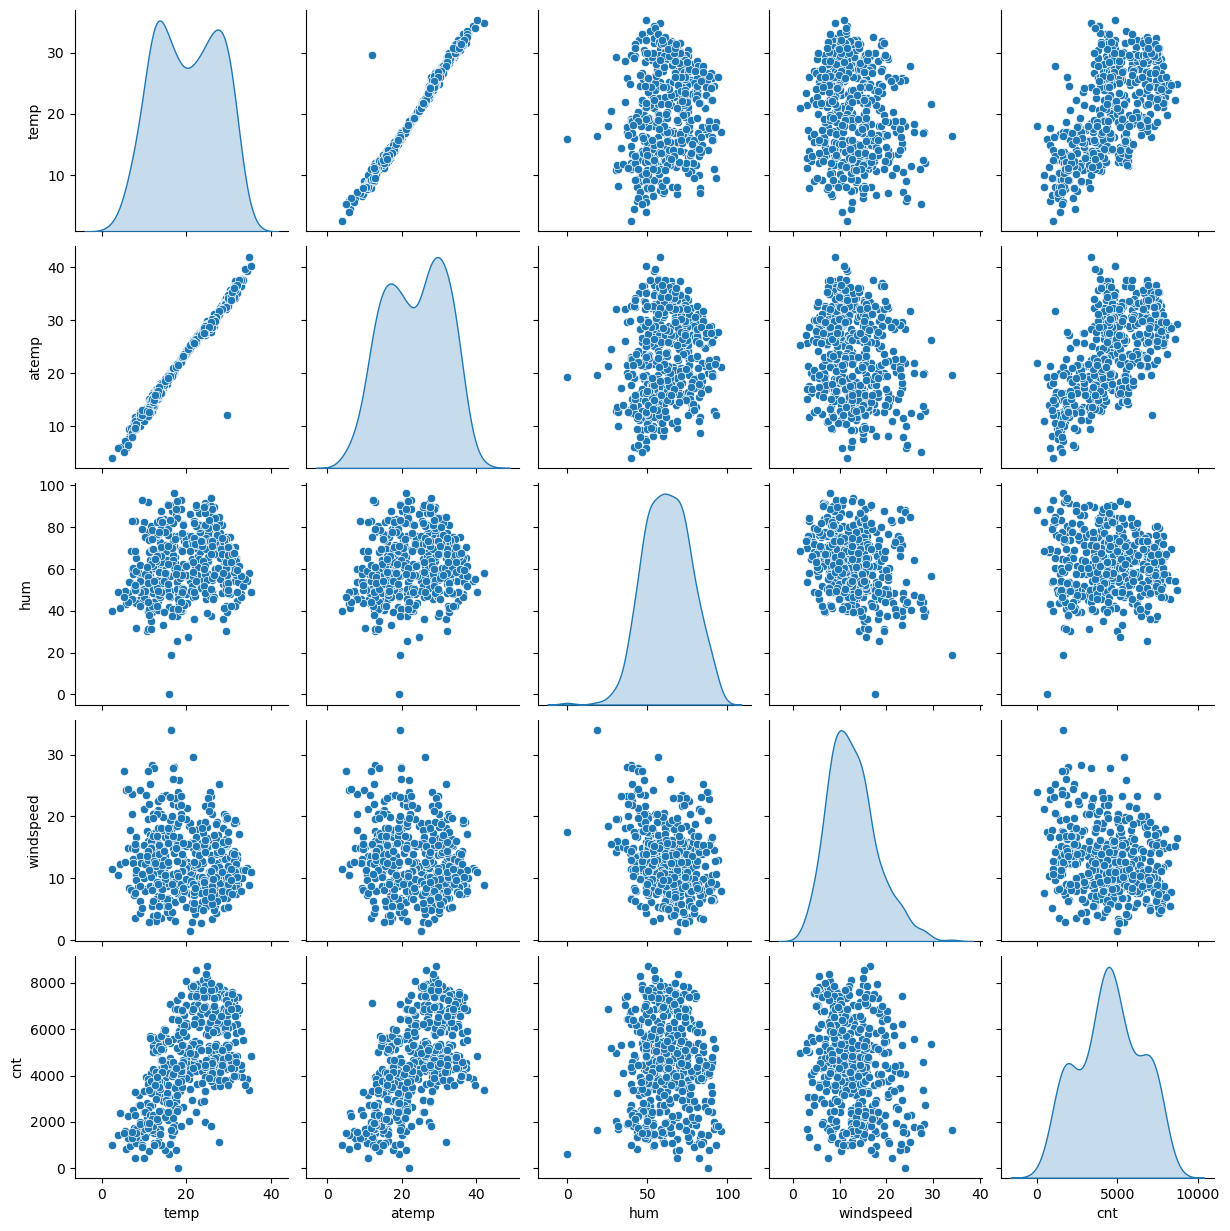

In [157]:
# Create a new dataframe of only numeric variables:

bike_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'

# Correlation Matrix¶

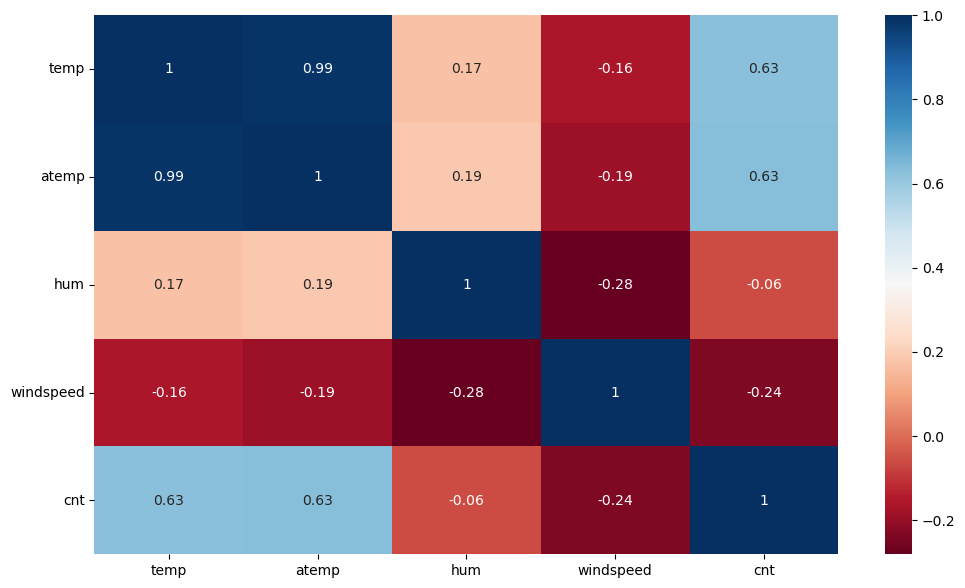

In [158]:
plt.figure(figsize = (12,7))
sns.heatmap(bike_num.corr(), annot = True, cmap="RdBu")
#plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

# RESCALING THE FEATURES

In [184]:
from sklearn.preprocessing import MinMaxScaler

In [186]:
scaler = MinMaxScaler()

In [187]:
# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
483,1,0,0,18.791653,22.50605,58.7083,7.832836,6304,False,True,...,False,False,False,False,False,False,False,False,False,False
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,False,False,...,True,False,False,False,False,False,False,True,False,False
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,False,False,...,False,False,True,False,False,False,False,False,False,False
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,False,False,...,False,False,False,False,False,False,False,False,False,True
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,True,False,...,False,False,False,False,False,False,False,False,False,False


In [188]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [189]:
# Checking values after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,False,True,...,False,False,False,False,False,False,False,False,False,False
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,False,False,...,True,False,False,False,False,False,False,True,False,False
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,False,False,...,False,False,True,False,False,False,False,False,False,False
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,False,False,...,False,False,False,False,False,False,False,False,False,True
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,True,False,...,False,False,False,False,False,False,False,False,False,False


In [190]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144
std,0.500487,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# BUILDING A LINEAR MODEL
#Dividing into X and Y sets for the model building

In [191]:
y_train = df_train.pop('cnt')
X_train = df_train
y_train

483    0.722734
650    0.815347
212    0.488265
714    0.433042
8      0.092039
         ...   
467    0.733548
444    0.714220
46     0.240796
374    0.411413
366    0.221928
Name: cnt, Length: 510, dtype: float64

**RFE**(
Recursive feature elimination): We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [192]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [196]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()

# Initialize RFE with the Linear Regression model and the number of features to select
rfe = RFE(estimator=lm, n_features_to_select=15)

# Fit RFE
rfe = rfe.fit(X_train, y_train)

In [197]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 15),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 11),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 6),
 ('mnth_Jan', False, 5),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', True, 1),
 ('mnth_May', False, 3),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_1', False, 4),
 ('weekday_2', False, 13),
 ('weekday_3', False, 9),
 ('weekday_4', False, 10),
 ('weekday_5', False, 8),
 ('weekday_6', True, 1),
 ('weathersit_Light_Snow_Rain', True, 1),
 ('weathersit_Mist_Cloudy', True, 1)]

In [198]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Mar', 'mnth_Nov',
       'mnth_Sep', 'weekday_6', 'weathersit_Light_Snow_Rain',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [199]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'season_Summer', 'mnth_Aug', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jun', 'mnth_May', 'mnth_Oct', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5'],
      dtype='object')

In [204]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [210]:
bool_cols = X_train_rfe.select_dtypes(include='bool').columns
X_train_rfe[bool_cols] = X_train_rfe[bool_cols].astype(int)

In [211]:
X_train_rfe.dtypes

yr                              int64
temp                          float64
atemp                         float64
hum                           float64
windspeed                     float64
season_Spring                   int32
season_Winter                   int32
mnth_Dec                        int32
mnth_Jul                        int32
mnth_Mar                        int32
mnth_Nov                        int32
mnth_Sep                        int32
weekday_6                       int32
weathersit_Light_Snow_Rain      int32
weathersit_Mist_Cloudy          int32
dtype: object

# Building Linear Model using STATS MODEL -1

#VIF Check

In [212]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [213]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,353.99
2,atemp,351.62
3,hum,22.90
4,windspeed,5.15
6,season_Winter,2.75
5,season_Spring,2.68
14,weathersit_Mist_Cloudy,2.26
0,yr,2.05
10,mnth_Nov,1.83
8,mnth_Jul,1.41


In [214]:
import statsmodels.api as sm

In [215]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [216]:
# Check the parameters obtained

lr1.params

const                         0.360643
yr                            0.229045
temp                          0.327628
atemp                         0.138868
hum                          -0.170456
windspeed                    -0.184512
season_Spring                -0.124363
season_Winter                 0.077731
mnth_Dec                     -0.040935
mnth_Jul                     -0.054367
mnth_Mar                      0.048370
mnth_Nov                     -0.058427
mnth_Sep                      0.060833
weekday_6                     0.023050
weathersit_Light_Snow_Rain   -0.260751
weathersit_Mist_Cloudy       -0.046952
dtype: float64

In [217]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     169.5
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          1.08e-183
Time:                        15:13:52   Log-Likelihood:                 502.27
No. Observations:                 510   AIC:                            -972.5
Df Residuals:                     494   BIC:                            -904.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Model - 2
Removing the variable 'atemp' based on its Very High 'VIF' value.
Even though the VIF of atemp is second highest, we decided to drop 'atemp' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [218]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [219]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,22.47
1,temp,15.82
3,windspeed,5.03
5,season_Winter,2.72
4,season_Spring,2.67
13,weathersit_Mist_Cloudy,2.26
0,yr,2.05
9,mnth_Nov,1.82
7,mnth_Jul,1.41
6,mnth_Dec,1.40


In [220]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [221]:
lr2.params

const                         0.363239
yr                            0.229046
temp                          0.455832
hum                          -0.168323
windspeed                    -0.189392
season_Spring                -0.124722
season_Winter                 0.078848
mnth_Dec                     -0.041033
mnth_Jul                     -0.054433
mnth_Mar                      0.049063
mnth_Nov                     -0.058988
mnth_Sep                      0.059970
weekday_6                     0.023227
weathersit_Light_Snow_Rain   -0.261902
weathersit_Mist_Cloudy       -0.047326
dtype: float64

In [222]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.5
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          1.31e-184
Time:                        15:14:59   Log-Likelihood:                 501.74
No. Observations:                 510   AIC:                            -973.5
Df Residuals:                     495   BIC:                            -910.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Model - 3
Removing the variable 'hum' based on its Very High 'VIF' value.

In [223]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [224]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.14
2,windspeed,5.00
4,season_Winter,2.35
0,yr,2.04
3,season_Spring,1.90
8,mnth_Nov,1.80
12,weathersit_Mist_Cloudy,1.53
6,mnth_Jul,1.37
5,mnth_Dec,1.34
7,mnth_Mar,1.22


In [225]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [226]:
# Check the parameters obtained

lr3.params

const                         0.268588
yr                            0.233359
temp                          0.426568
windspeed                    -0.154471
season_Spring                -0.126408
season_Winter                 0.073031
mnth_Dec                     -0.050360
mnth_Jul                     -0.047280
mnth_Mar                      0.055023
mnth_Nov                     -0.058744
mnth_Sep                      0.054855
weekday_6                     0.022821
weathersit_Light_Snow_Rain   -0.311736
weathersit_Mist_Cloudy       -0.075200
dtype: float64

In [227]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     187.0
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          1.34e-181
Time:                        15:16:43   Log-Likelihood:                 491.83
No. Observations:                 510   AIC:                            -955.7
Df Residuals:                     496   BIC:                            -896.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Model - 4
Removing the variable windspeed based on its Very High 'VIF' value.
Even though the VIF of windspeed is second highest, we decided to drop 'windspeed' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [228]:
X_train_new = X_train_new.drop(['windspeed'], axis = 1)

In [229]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.94
3,season_Winter,2.34
0,yr,2.02
7,mnth_Nov,1.75
11,weathersit_Mist_Cloudy,1.52
2,season_Spring,1.46
4,mnth_Dec,1.34
5,mnth_Jul,1.34
6,mnth_Mar,1.21
8,mnth_Sep,1.21


In [230]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [231]:
lr4.params

const                         0.202871
yr                            0.231028
temp                          0.444312
season_Spring                -0.126726
season_Winter                 0.085769
mnth_Dec                     -0.044757
mnth_Jul                     -0.040682
mnth_Mar                      0.054501
mnth_Nov                     -0.064701
mnth_Sep                      0.061484
weekday_6                     0.020299
weathersit_Light_Snow_Rain   -0.328105
weathersit_Mist_Cloudy       -0.073264
dtype: float64

In [232]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     188.0
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          5.49e-176
Time:                        15:18:27   Log-Likelihood:                 475.76
No. Observations:                 510   AIC:                            -925.5
Df Residuals:                     497   BIC:                            -870.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Model - 5
All Variables VIF values are well below 5. The 'mnth_Jul' variable having its High P-value 0.048 which is close to 0.05 hence for safety purpose I drop this variable.

In [233]:
X_train_new = X_train_new.drop(["mnth_Jul"], axis = 1)

In [234]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.36
3,season_Winter,2.31
0,yr,2.02
6,mnth_Nov,1.75
10,weathersit_Mist_Cloudy,1.50
2,season_Spring,1.44
4,mnth_Dec,1.34
5,mnth_Mar,1.21
7,mnth_Sep,1.17
8,weekday_6,1.17


In [235]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [236]:
# Check the parameters obtained

lr5.params

const                         0.213659
yr                            0.231320
temp                          0.418216
season_Spring                -0.130395
season_Winter                 0.086760
mnth_Dec                     -0.046669
mnth_Mar                      0.055878
mnth_Nov                     -0.067079
mnth_Sep                      0.067763
weekday_6                     0.019663
weathersit_Light_Snow_Rain   -0.329521
weathersit_Mist_Cloudy       -0.071728
dtype: float64

In [237]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     203.0
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          4.71e-176
Time:                        15:19:34   Log-Likelihood:                 473.15
No. Observations:                 510   AIC:                            -922.3
Df Residuals:                     498   BIC:                            -871.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

# Final Model Interpretation
Hypothesis Testing:
Hypothesis testing states that:




const                          0.2137      
yr                             0.2313     
temp                           0.4182     
season_Spring                 -0.1304      
season_Winter                  0.0868     
mnth_Dec                      -0.0467      
mnth_Mar                       0.0559     
mnth_Nov                      -0.0671      
mnth_Sep                       0.0678      
weekday_6                      0.0197      
weathersit_Light_Snow_Rain    -0.3295      
weathersit_Mist_Cloudy        -0.0717      


From the lr5 model summary, it is evident that all our coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS

# Residual Analysis Of Training Data

In [238]:
y_train_pred = lr5.predict(X_train_lm5)

Text(0.5, 0, 'Errors')

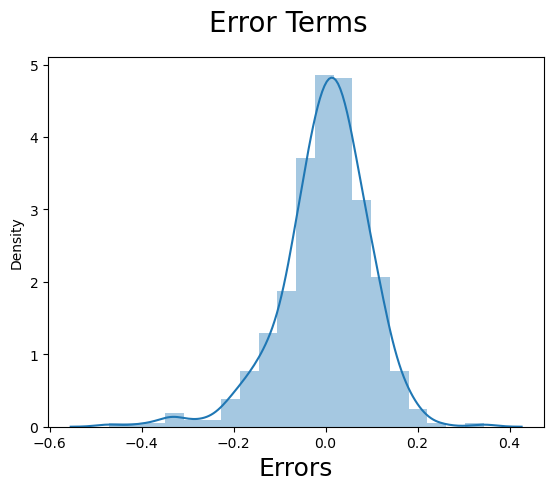

In [239]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

There is a linear relationship between X and Y¶

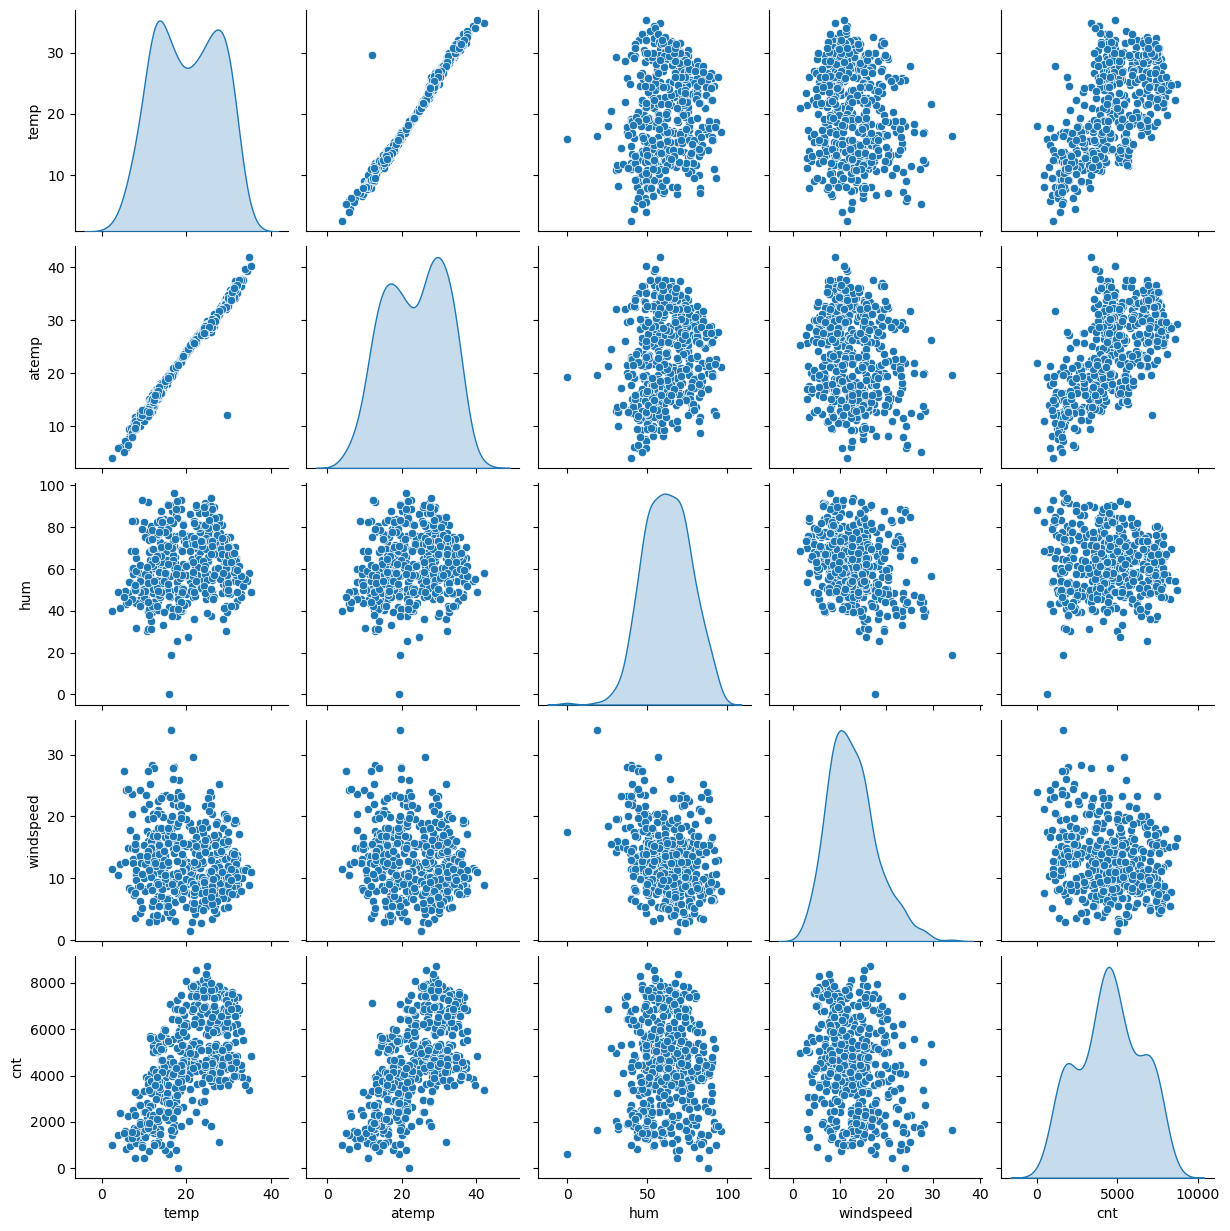

In [240]:
bike_new=bike_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

There is No Multicollinearity between the predictor variables

In [241]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.36
3,season_Winter,2.31
0,yr,2.02
6,mnth_Nov,1.75
10,weathersit_Mist_Cloudy,1.50
2,season_Spring,1.44
4,mnth_Dec,1.34
5,mnth_Mar,1.21
7,mnth_Sep,1.17
8,weekday_6,1.17


From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

# MAKING PREDICTION USING FINAL MODEL¶

Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr5)

Applying the scaling on the test sets

In [242]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [243]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,True,False,...,False,False,False,False,False,False,False,False,False,False
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,False,True,...,False,False,False,False,False,False,False,True,False,False
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,False,False,...,False,False,False,False,False,False,False,False,False,False
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,False,True,...,False,False,False,False,False,False,False,False,False,False
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,False,False,...,False,False,False,True,False,False,False,False,False,True


In [244]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          219 non-null    int64  
 1   holiday                     219 non-null    int64  
 2   workingday                  219 non-null    int64  
 3   temp                        219 non-null    float64
 4   atemp                       219 non-null    float64
 5   hum                         219 non-null    float64
 6   windspeed                   219 non-null    float64
 7   season_Spring               219 non-null    bool   
 8   season_Summer               219 non-null    bool   
 9   season_Winter               219 non-null    bool   
 10  mnth_Aug                    219 non-null    bool   
 11  mnth_Dec                    219 non-null    bool   
 12  mnth_Feb                    219 non-null    bool   
 13  mnth_Jan                    219 non-nul

In [245]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm5 = sm.add_constant(X_test)
X_test_lm5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   const                       219 non-null    float64
 1   yr                          219 non-null    int64  
 2   temp                        219 non-null    float64
 3   season_Spring               219 non-null    bool   
 4   season_Winter               219 non-null    bool   
 5   mnth_Dec                    219 non-null    bool   
 6   mnth_Mar                    219 non-null    bool   
 7   mnth_Nov                    219 non-null    bool   
 8   mnth_Sep                    219 non-null    bool   
 9   weekday_6                   219 non-null    bool   
 10  weathersit_Light_Snow_Rain  219 non-null    bool   
 11  weathersit_Mist_Cloudy      219 non-null    bool   
dtypes: bool(9), float64(2), int64(1)
memory usage: 8.8 KB


In [246]:
# Making predictions using the final model (lr6)

y_pred = lr5.predict(X_test_lm5)

# MODEL EVALUATION

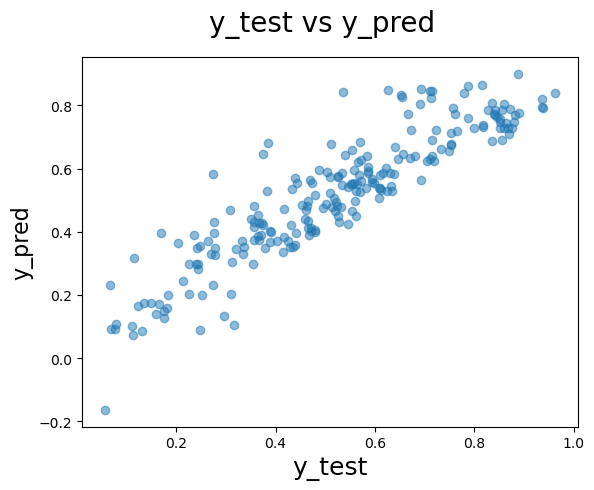

In [247]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

R^2 Value for TEST

In [248]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
r2_score(y_test, y_pred)

0.8181537104287557

Adjusted R^2 Value for TEST

In [249]:
# We already have the value of R^2 (calculated in above step)

r2=0.8224454904426144

In [250]:
# Get the shape of X_test
X_test.shape

(219, 11)

In [251]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8130102266497099

Final Result Comparison
Train R^2 :0.818
Train Adjusted R^2 :0.813
Test R^2 :0.822
Test Adjusted R^2 :0.813
This seems to be a really good model that can very well 'Generalize' various datasets.

In [252]:
r2_train=0.817
r2_test=0.822

In [253]:
# Checking the difference between the test-train r2 score 
print('Difference in r2 Score(%)',(-r2_train + r2_test)*100)

Difference in r2 Score(%) 0.5000000000000004


In [254]:
Train_Adjusted_R2 = 0.813
Test_Adjusted_R2 = 0.813

In [255]:
# Checking the difference between the test-train Adjusted_R2 score 
print('Difference in Adjusted_R2 Score(%)',(Train_Adjusted_R2-Test_Adjusted_R2)*100)

Difference in Adjusted_R2 Score(%) 0.0


# FINAL REPORT
As per our final Model, the top 3 predictor variables that influences the bike booking are:

Temperature (temp) 
Weather Situation 3 

Year (yr)

So, it's suggested to consider these variables utmost importance while planning, to achieve maximum Booking